# Histogram Generator for Paper

In [4]:
filename = "res.json"
human_folder = f"human/{filename}"
test_folder = [
    "10-4_vicuna7_naive-optim_500",
    "10-4_vicuna13_naive-optim_500",
    "vicuna13_1.6_self-const",
    "10-4_vicuna13-vip_nonvis-optim_500",
]
test_folder = [
    f"{tc}/{filename}" for tc in test_folder
]

In [54]:
import json
import seaborn as sns
import pandas as pd
import numpy as np

def gen_qar(path, excel=False):
    if not excel:
        with open(path, 'r') as f:
            j = json.load(f)
        q = [len(i["question"].split()) for i in j]
        a = [len(i["short_answer"].split()) for i in j]
        r = [len(i["reasoned_answer"].split()) for i in j]
    else:
        df = pd.read_excel(path.split("/")[0]+"/eval/xlsx/eval.xlsx", sheet_name='scoresheet')
        df = df.loc[(df.accuracy != -1) & ~(df.accuracy.isna())]

        q = df.question.values.tolist()
        a = df.short_answer.values.tolist()
        r = df.reasoned_answer.values.tolist()

        q = [len(i.split()) for i in q]
        a = [len(i.split()) for i in a]
        r = [len(i.split()) for i in r]


    return q,a,r

In [55]:
q0,a0,r0 = gen_qar(human_folder)
q1,a1,r1 = gen_qar(test_folder[0], excel=True)
q2,a2,r2 = gen_qar(test_folder[1], excel=True)
q3,a3,r3 = gen_qar(test_folder[2], excel=True)
q4,a4,r4 = gen_qar(test_folder[3], excel=True)

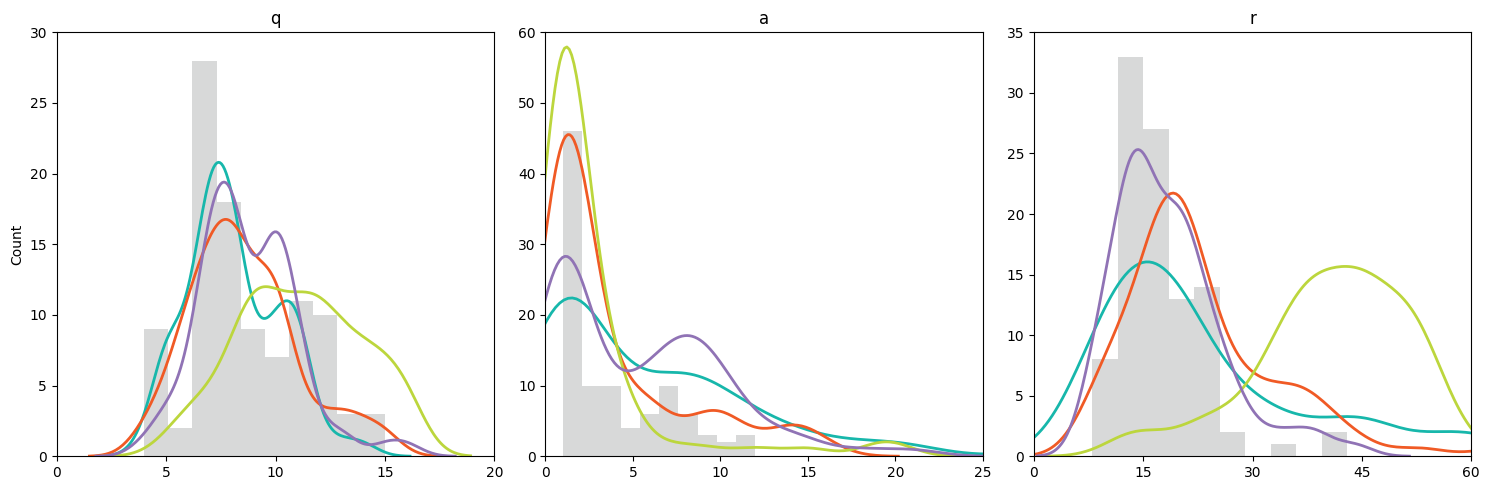

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes for subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Define a function to scale KDE by quantity over density
def plot_scaled_kde(data, bins, ax, factor, **kwargs):
    sns.kdeplot(data, ax=ax, bw_adjust=0.8, **kwargs)
    ax.lines[-1].set_ydata(ax.lines[-1].get_ydata() * factor)

# Histogram for q0, and KDEs for q1, q2, q3
sns.histplot(q0, bins=10, kde=False, color='#cbcdcd', ax=axs[0], edgecolor=None)
plot_scaled_kde(q1, bins=[0, 20], ax=axs[0], color='#17b7ab', linewidth=2, fill=False, factor=100)
plot_scaled_kde(q2, bins=[0, 20], ax=axs[0], color='#f05a25', linewidth=2, fill=False, factor=100)
plot_scaled_kde(q3, bins=[0, 20], ax=axs[0], color='#bcd63d', linewidth=2, fill=False, factor=100)
plot_scaled_kde(q4, bins=[0, 25], ax=axs[0], color='#9073b5', linewidth=2, fill=False, factor=100)

axs[0].set_xlim(0, 20)
axs[0].set_ylim(0, 30)
axs[0].set_title('q')
axs[0].set_xticks(range(0, 21, 5))

# Histogram for a0, and KDEs for a1, a2, a3
sns.histplot(a0, bins=10, kde=False, color='#cbcdcd', ax=axs[1], edgecolor=None)
plot_scaled_kde(a1, bins=[0, 25], ax=axs[1], color='#17b7ab', linewidth=2, fill=False, factor=250)
plot_scaled_kde(a2, bins=[0, 25], ax=axs[1], color='#f05a25', linewidth=2, fill=False, factor=250)
plot_scaled_kde(a3, bins=[0, 25], ax=axs[1], color='#bcd63d', linewidth=2, fill=False, factor=250)
plot_scaled_kde(a4, bins=[0, 25], ax=axs[1], color='#9073b5', linewidth=2, fill=False, factor=250)

axs[1].set_xlim(0, 25)
axs[1].set_ylim(0, 60)
axs[1].set_title('a')
axs[1].set_xticks(range(0, 26, 5))
axs[1].set_ylabel('')
# axs[1].set_yticklabels([])  # Remove y-axis labels

# Histogram for r0, and KDEs for r1, r2, r3
sns.histplot(r0, bins=10, kde=False, color='#cbcdcd', ax=axs[2], edgecolor=None)
plot_scaled_kde(r1, bins=[0, 50], ax=axs[2], color='#17b7ab', linewidth=2, fill=False, factor=420)
plot_scaled_kde(r2, bins=[0, 50], ax=axs[2], color='#f05a25', linewidth=2, fill=False, factor=420)
plot_scaled_kde(r3, bins=[0, 50], ax=axs[2], color='#bcd63d', linewidth=2, fill=False, factor=420)
plot_scaled_kde(r4, bins=[0, 50], ax=axs[2], color='#9073b5', linewidth=2, fill=False, factor=420)

axs[2].set_xlim(0, 60)
axs[2].set_ylim(0, 35)
axs[2].set_title('r')
axs[2].set_xticks(range(0, 61, 15))
axs[2].set_ylabel('')

# axs[2].set_yticklabels([])  # Remove y-axis labels

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

fig.savefig('img.png', dpi=200)

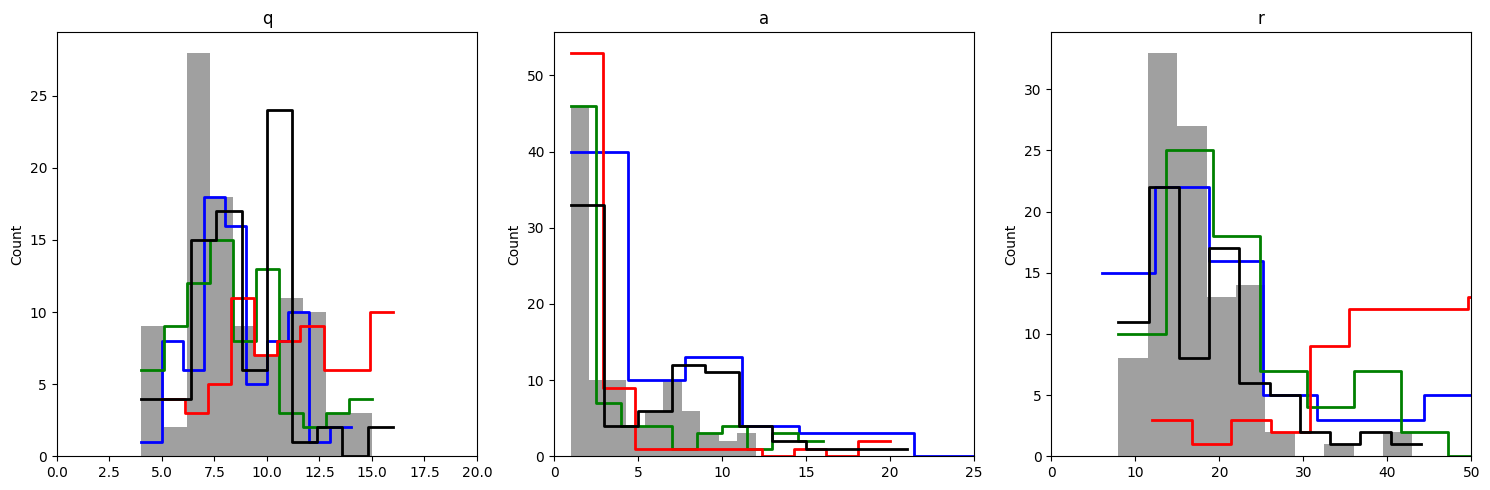

In [92]:
import matplotlib.pyplot as plt


# Set up the figure and axes for subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Histogram and additional histograms for q
sns.histplot(q0, bins=10, kde=False, color='grey', ax=axs[0], edgecolor=None)
sns.histplot(q1, bins=10, color='blue', ax=axs[0], fill=False,element="step", linewidth=2)
sns.histplot(q2, bins=10, color='green', ax=axs[0], fill=False, linewidth=2,element="step")
sns.histplot(q3, bins=10, color='red', ax=axs[0], fill=False, linewidth=2,element="step")
sns.histplot(q4, bins=10, color='black', ax=axs[0], fill=False, linewidth=2,element="step")

axs[0].set_xlim(0, 20)
axs[0].set_title('q')

# Histogram and additional histograms for a
sns.histplot(a0, bins=10, kde=False, color='grey', ax=axs[1], edgecolor=None)
sns.histplot(a1, bins=10, color='blue', ax=axs[1], fill=False, linewidth=2,element="step")
sns.histplot(a2, bins=10, color='green', ax=axs[1], fill=False, linewidth=2,element="step")
sns.histplot(a3, bins=10, color='red', ax=axs[1], fill=False, linewidth=2,element="step")
sns.histplot(a4, bins=10, color='black', ax=axs[1], fill=False, linewidth=2,element="step")

axs[1].set_xlim(0, 25)
axs[1].set_title('a')

# Histogram and additional histograms for r
sns.histplot(r0, bins=10, kde=False, color='grey', ax=axs[2], edgecolor=None)
sns.histplot(r1, bins=10, color='blue', ax=axs[2], fill=False, linewidth=2,element="step")
sns.histplot(r2, bins=10, color='green', ax=axs[2], fill=False, linewidth=2,element="step")
sns.histplot(r3, bins=10, color='red', ax=axs[2], fill=False, linewidth=2,element="step")
sns.histplot(r4, bins=10, color='black', ax=axs[2], fill=False, linewidth=2,element="step")

axs[2].set_xlim(0, 50)
axs[2].set_title('r')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [7]:
import json
res = {}

for tcf in test_folder:
    with open(tcf, 'r') as f:
        j = json.load(f)

[{'id': 1, 'img_id': '2353575.jpg', 'question': 'Are the people playing with a frisbee?', 'short_answer': 'Yes', 'reasoned_answer': 'The image shows a man and a child playing with a frisbee, which is a common outdoor activity.'}, {'id': 2, 'img_id': '2353575.jpg', 'question': 'Short Answer:', 'short_answer': 'Reason:', 'reasoned_answer': 'The boy is throwing a yellow frisbee in a grassy field.'}, {'id': 3, 'img_id': '2384295.jpg', 'question': 'Is the boy wearing a shirt?', 'short_answer': 'Yes', 'reasoned_answer': 'The boy is wearing a shirt, which is visible in the image.'}, {'id': 4, 'img_id': '2384295.jpg', 'question': 'What is the boy holding in his mouth?', 'short_answer': 'A toothbrush', 'reasoned_answer': 'The boy is brushing his teeth while standing next to a yellow bicycle.'}, {'id': 5, 'img_id': '2384295.jpg', 'question': 'What is the boy holding in his mouth?', 'short_answer': 'A toothbrush', 'reasoned_answer': 'The boy is brushing his teeth while standing next to a yellow b